# Example for analysis a barrier-barrier scan of a single quantum dot

Pieter Eendebak <pieter.eendebak@tno.nl>

In [1]:
import qtt
import qtt.simulation.virtual_dot_array
import qtt.algorithms.onedot

nr_dots = 3
station = qtt.simulation.virtual_dot_array.initialize(reinit=True, nr_dots=nr_dots, maxelectrons=2, verbose=0)
gates = station.gates

gv={'B0': -300.000,'B1': 0.487,'B2': -0.126,'B3': 0.000,'D0': 0.111,'O1': -0.478,'O2': 0.283,'O3': 0.404,'O4': 0.070,'O5': 0.392,'P1': 0.436,'P2': 0.182,'P3': 39.570,'SD1a': -0.160,'SD1b': -0.022,'SD1c': 0.425,'bias_1': -0.312,'bias_2': 0.063}
gates.resetgates(gv,gv, verbose=0)

Make a 2D scan of the barrier gates.

In [2]:
start = -250
scanjob = qtt.measurements.scans.scanjob_t({'sweepdata': dict({'param': 'B0', 'start': start, 'end': start + 200, 'step': 4., 'wait_time': 0.}), 'minstrument': ['keithley3.amplitude']})
scanjob['stepdata'] = dict({'param': 'B1', 'start': start, 'end': start + 200, 'step': 5.})
data = qtt.measurements.scans.scan2D(station, scanjob)

scan2D: 0/40: time 00:00:00 (~00:00:00 remaining): setting B1 to -250.000


onedotGetBalance one-dot: balance point 0 at: -214.0 -195.0 [mV]
onedotGetBalance: balance point at: -214.0 -195.0 [mV]


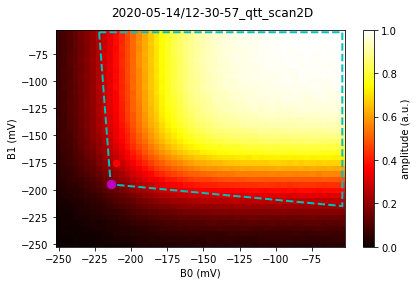

In [3]:
results, ptv= qtt.algorithms.onedot.onedotGetBalance(dataset=data, verbose=1, fig=None)
qtt.algorithms.onedot.plot_onedot(results, ds = data, fig=1000, verbose=2)

For scans where Coulomb diamonds are visible, one can use `onedotGetBalanceFine` to improve the fitting.

In [4]:
ptfine, rfine=qtt.algorithms.onedot.onedotGetBalanceFine(impixel=None, dd=data, fig=None)

onedotGetBalanceFine: point/best filter value: 0.01/11.55


In [5]:
print(ptfine)

[[-224.02391035]
 [-162.47011206]]
